## Implementing MLPs with Keras

### Introduction to Keras and the Sequential API

**What is Keras?**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Initially developed as an independent project, Keras has now been integrated into TensorFlow as `tf.keras`, making it TensorFlow's official high-level API. It simplifies many aspects of creating and training neural networks, especially for beginners, due to its user-friendly and modular approach.

- **High-Level API:** Keras abstracts away many of the complex details of working directly with TensorFlow, making it more accessible and easier to experiment with neural networks.
- **Flexibility and Ease-of-Use:** Keras provides simple APIs for common machine learning tasks, making it easy to build and train models with just a few lines of code.
- **Integration with TensorFlow:** As part of TensorFlow, Keras can leverage all the powerful features of TensorFlow, including distributed training, performance optimizations, and production-ready deployment.

**Sequential API in Keras**

One of the key features of Keras is its `Sequential` API, which allows for the easy stacking of layers to create neural networks:

- **Sequential Model:** This is the simplest type of model in Keras, ideal for plain stacks of layers where each layer has exactly one input tensor and one output tensor.
- **Ease of Creation:** Models can be constructed by simply adding layers in sequence, making it very intuitive, especially for standard feedforward neural networks.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>


**What is a tensor?**

A tensor is a generalized mathematical concept that can be thought of as an extension of more familiar entities like scalars, vectors, and matrices to higher dimensions. In the context of deep learning and data representation, tensors are multi-dimensional arrays of numerical values and serve as the basic data structures.

| A scaler, shape: [] | A vector, shape: [3] | A matrix, shape: [3,2] |
| --------------------|----------------------|------------------------|
|![scaler](assets/scalar.png) | ![vector](assets/vector.png) | ![matrix](assets/matrix.png)|

### Different Types of Tensors:

1. **Scalars (0D tensors):**
   - A single number is considered a scalar (or 0-dimensional tensor). For example, `5` or `-3.2`.
   - In Python, a scalar can be represented by a float or int type.

2. **Vectors (1D tensors):**
   - A vector is an array of numbers. It has one axis and is known as a 1D tensor. For example, `[1, 3, 5, 7]`.
   - In Python, a 1D tensor can be represented using a list or a 1D array in NumPy.

3. **Matrices (2D tensors):**
   - A matrix has two axes (often referred to as rows and columns). It's a 2D tensor. For example, `[[1, 2, 3], [4, 5, 6]]`.
   - In Python, a matrix is typically represented using a 2D NumPy array.

4. **3D tensors and higher-dimensional tensors:**
   - When you start stacking matrices in a new axis, you get a 3D tensor, which can be visualized as a cube of numbers.
   - Continuing this pattern leads to higher-dimensional tensors (4D, 5D, etc.). In deep learning, these are common, especially in applications involving images, video, and other complex data types.

| A 3-axis tensor, shape: [3, 2, 5]|||
| --------------------|---|---|
|![3-axis numpy](assets/3-axis_numpy.png) | ![3-axis front](assets/3-axis_front.png) | ![3-axis block](assets/3-axis_block.png)|


### Tensors in Deep Learning:

- **Data Representation:** In deep learning frameworks, tensors are used to represent the data. For instance, a 3D tensor could be used for time-series data, a 4D tensor for image data (including channels, such as color channels in an image), and a 5D tensor for video data (which has frames over time).

- **Operations on Tensors:** Neural networks operations, like matrix multiplication, additions, and activation functions, are performed using tensors. These operations are efficiently implemented to handle high-dimensional data.

- **Tensor Properties:**
  - **Shape:** The dimensions of the tensor. For instance, a matrix with `n` rows and `m` columns has the shape `(n, m)`.
  - **Data Type:** The type of data stored in the tensor (e.g., float32, int, etc.). In deep learning, it's often important to manage the data types to control memory usage and computational efficiency.

- **Frameworks:** TensorFlow, as its name suggests, is designed around tensors. PyTorch also uses tensors as its fundamental data structure. These frameworks provide libraries to create, manipulate, and compute on tensors, usually with GPU acceleration for high efficiency.


</div>


### Building a Simple MLP for the Fashion MNIST Dataset

Let's go through the process of building a simple Multilayer Perceptron (MLP) using Keras to classify images from the Fashion MNIST dataset.

1. **Dataset:** Fashion MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes (like T-shirts, trousers, bags, etc.).

In [50]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [51]:
y_train.shape

(55000,)

Each pixel intensity is represented as a byte (0 to 255):

In [3]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

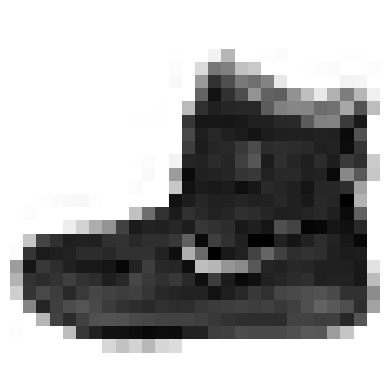

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [6]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [14]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

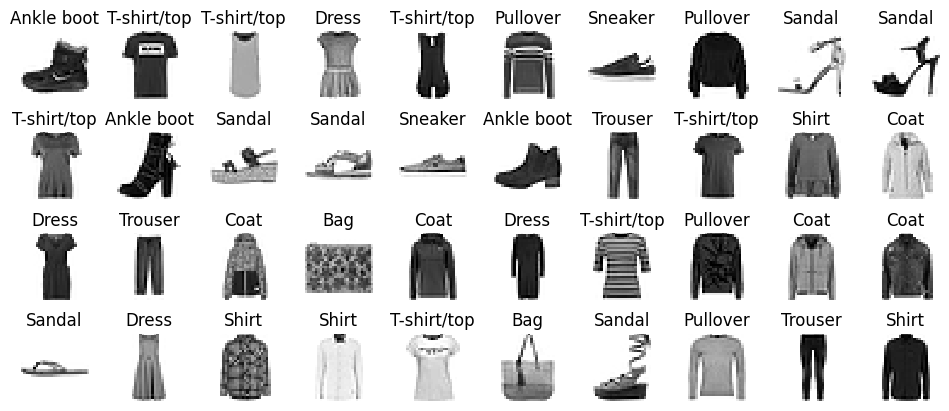

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

2. **Building the Model:**
   - Import necessary modules from Keras.
   - Initialize a Sequential model.
   - Add layers (e.g., `Dense` layers for a fully connected network) with appropriate activation functions.
   - Flatten the input data if necessary (since Fashion MNIST images are 2D).

There are different ways to create a model, differing only in syntax.

In [16]:
import tensorflow as tf

tf.random.set_seed(42)

# This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.
model = tf.keras.Sequential()

# Next, we specify the input shape, which doesn’t include the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))

# The role of the Flatten layer is to convert each input image into a 1D array: for example, if it receives a batch of shape [32, 28, 28], it will reshape it to [32, 784]. In other words, if it receives input data X, it computes X.reshape(-1, 784). This layer doesn’t have any parameters; it’s just there to do some simple preprocessing.
model.add(tf.keras.layers.Flatten())

# Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes the activation at each neuron based on inputs from the previous layer.
model.add(tf.keras.layers.Dense(300, activation="relu")) 

# Etc. 
model.add(tf.keras.layers.Dense(100, activation="relu")) # Second Dense layer with 100 neurons and ReLU 

#Here we need to specify as many neurons as we have classes, and use the "softmax" activation function because our classes are exclusive
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

More concisely...

In [17]:
tf.keras.backend.clear_session() # extra code because we already built a model above – this clears the session to reset the name counters
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

**Inspecting the model**

Keras provides numerous ways to inspect the model.  A good high level summary is available with `model.summary()`.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You can also look at the structure of the network graphically, but you'll need to have `graphviz` installed.  This is a horrendously long install process on Macs, so be prepared!

In [39]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Layers are stored in a list accessible via the `layers` attribute.

In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

We can even look at the raw weights and biases of the individual connections in any given layer.

In [53]:
weights, biases = hidden1.get_weights()
weights

array([[ 1.4149994e-02, -2.0420544e-02, -6.8744281e-03, ...,
         4.6454370e-05, -6.0585786e-02, -3.5817816e-03],
       [-5.8548030e-02,  3.4077488e-02, -2.5641806e-02, ...,
        -2.3960099e-02, -1.2295090e-02,  4.4075318e-02],
       [-2.6729988e-02,  6.5801203e-02, -1.6386019e-02, ...,
        -6.2015481e-02, -6.8558089e-02,  2.7079715e-03],
       ...,
       [ 6.5017261e-02, -9.0477811e-03, -1.3007981e-02, ...,
         4.6001382e-02, -3.6045913e-02,  4.0062107e-02],
       [ 1.3298043e-03,  5.8951555e-03, -1.6457736e-02, ...,
        -7.3348866e-03, -2.7352752e-02, -4.3942817e-02],
       [-6.2252514e-02,  6.8907037e-02,  6.9448985e-02, ...,
         6.8020016e-02, -1.3439589e-02,  5.5867918e-02]], dtype=float32)

In [54]:
weights.shape

(784, 300)

3. **Compiling the Model:**
   - Choose an optimizer (like 'adam' or 'sgd').
   - Select an appropriate loss function (like 'sparse_categorical_crossentropy' for multi-class classification).
   - Define metrics for monitoring (like 'accuracy').

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=["accuracy"])

This is the same as:

In [57]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])


4. **Training the Model:**
   - Use the `fit` method on the model, passing the training data, number of epochs, and validation data (if available).

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

**Batches and Epochs**

Batch size (`batch_size` in the `fit` method) and epochs are used to control the training process in a neural network, and so it's useful to have a good handle on these terms.

### Batch Size

When training a neural network, data is typically passed through the network in "batches". Each batch contains a subset of the total training data. The batch size is the number of samples present in one batch.

- **Iterations:** An iteration is one forward pass and one backward pass of all the training examples in one batch. The number of iterations is equal to the number of batches needed to process the entire training set once.

#### Why Does Batch Size Matter?

1. **Memory Constraints:**
   - Larger batches require more memory. With a limited amount of GPU or CPU memory, there's an upper bound to the batch size that can be used. If the batch size is too large, you may encounter memory errors.

2. **Training Speed:**
   - Larger batches often allow for more efficient computation. Modern deep learning libraries and hardware (like GPUs) are optimized for parallel computations that can process large batches of data more efficiently than smaller batches.

3. **Convergence and Performance:**
   - Batch size can affect the model's ability to converge to a global or local minimum and the quality of the minimum found.
   - Smaller batches can offer a regularizing effect and less stable convergence, potentially leading to better generalization in some models.
   - Larger batches provide a more accurate estimate of the gradient, but they can also lead to convergence to sharp minimizers that may not generalize as well.

4. **Stochastic Gradient Descent and Variants:**
   - With a batch size of 1, the algorithm is a pure Stochastic Gradient Descent (SGD), where each batch contains a single sample. This can lead to very noisy gradient updates and a longer time to converge, but potentially better generalization.
   - Larger batch sizes approximate the gradient of the entire dataset more accurately, but the noise in the gradient estimate can sometimes help escape local minima.


#### Choosing Batch Size

The choice of batch size is often a balance between these factors:

- **Memory Limitations:** Determined by your hardware.
- **Convergence Properties:** Depending on the specific problem and model architecture, certain batch sizes may lead to better performance.
- **Training Speed:** Larger batches may train faster per epoch but might require more epochs for convergence.

In practice, batch sizes are often chosen based on empirical results and hardware constraints. Common batch sizes include 32 (the default in keras), 64, 128, 256, etc., but the optimal size can vary significantly depending on the specific application and dataset. Experimenting with different batch sizes is a key part of the model tuning process.

### Epochs

An "epoch" is a term used to describe one complete pass of the entire training dataset through the learning algorithm.

   - During one epoch, every sample in the training dataset is presented once to the network, allowing the model to learn from the entire dataset.
   - Each epoch consists of several iterations, depending on the batch size. For instance, if you have 1,000 training samples and a batch size of 100, it takes 10 iterations to complete one epoch.
   - In each epoch, the weights of the network are updated multiple times through the backpropagation algorithm, gradually improving the model's performance on the training data.

#### Why Do Epochs Matter?

1. **Learning Process:**
   - Multiple epochs are necessary because passing the entire dataset through the network once is usually not enough to learn all the features and patterns in the data. With each epoch, the model gets a chance to learn more about the data.

2. **Convergence:**
   - More epochs can lead to better convergence, meaning the model's loss on the training data (and hopefully on unseen data) decreases, and its accuracy improves.
   - However, too many epochs can lead to overfitting, where the model starts to learn the noise in the training data, leading to poor generalization on new, unseen data.

3. **Trade-offs:**
   - **Computational Cost:** More epochs mean more computation, so training takes longer and consumes more resources.
   - **Early Stopping:** This technique involves stopping the training process before the number of specified epochs is reached if the model stops showing improvement, which can save computational resources and prevent overfitting.

4. **Hyperparameter Tuning:**
   - The number of epochs is a hyperparameter that you may need to tune. The optimal number of epochs varies widely based on the specific problem, dataset, and neural network architecture.

### Practical Implications

- **Monitoring Performance:** During training, you should monitor the model's performance on a separate validation set to gauge how well it is learning. If performance on the validation set begins to degrade (i.e., validation loss increases or validation accuracy decreases), this may be a sign of overfitting.

- **Flexibility:** In practice, the choice of the number of epochs is flexible and often determined by balancing time and computational resources with the need for sufficient model training.

- **Learning Rate Scheduling:** Sometimes, adjusting the learning rate during training (e.g., reducing it gradually) can be more effective than simply setting a fixed number of epochs.

In summary, epochs are a fundamental concept in the training of neural networks, balancing the amount of learning with computational efficiency and the risk of overfitting. The appropriate number of epochs is often found through experimentation and considering the specifics of each project.

In [58]:
# Note here that instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation.  This can sometimes be more convenient

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 548089536.0000 - sparse_categorical_accuracy: 0.1007 - val_loss: 2.3041 - val_sparse_categorical_accuracy: 0.1006
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0979 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0934
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0934
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1016
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0934
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 2.3027

Note that during each step, Keras will measure the loss and any metrics set at the end of each epoch.  If you pass an optional validation set, Keras will evaluate this as well.  This is really import to see how well your model is doing on held out data.  If performance on the training set is much better than the validation set, it's likely that you are overfitting!


5. **Evaluating the Model:**
   - Evaluate the model's performance on the test data using the `evaluate` method.

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 4.5188 - sparse_categorical_accuracy: 0.1000 - 229ms/epoch - 731us/step

Test accuracy: 0.10000000149011612


Note also that the `fit` method returns a history method that we can use to examine the training history. It contains the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). 

In [60]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [61]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


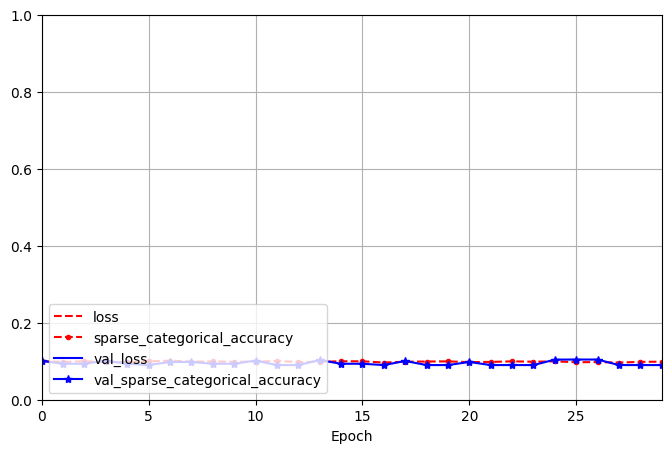

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

We can now use the model to make predictions.

In [63]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 131ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [64]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([7, 7, 7])

In [65]:
import numpy as np
np.array(class_names)[y_pred]

array(['Sneaker', 'Sneaker', 'Sneaker'], dtype='<U11')

In [66]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

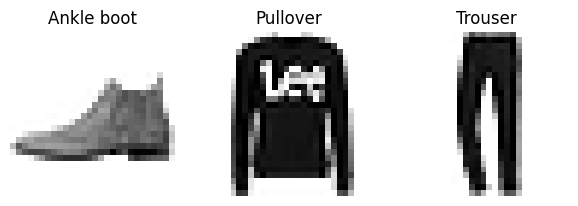

In [67]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Exercise:  Hands-on with the Keras Sequential API

Try building a MLP in Keras to fit the MNIST handwriting data. Here are some tips:

- Make sure to flatten your images with a "Flatten" layer
- Add one or two Dense layers with ReLU activation
- Finish with a dense output layer with 10 neurons (one for each digit)
- Compile the model with the `adam` optimizer, `sparse_categorical_crossentropy` loss, and `accuracy` metric
- Use a validation_split parameter with 20 percent of your data for validation during training
- Train with a reasonable number of epochs (e.g. 5-10) and evaluate your performance on the test set
- Explore with different numbers of neurons, layers, and epochs!




In [68]:
#Just to get you started, here's some data!
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tensorflows data is from 0-255, so here we just normalize to the 0-1 range:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [76]:
y_train.shape

(60000,)

In [77]:
#Just to get you started, here's some data!
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tensorflows data is from 0-255, so here we just normalize to the 0-1 range:
x_train, x_test = x_train / 255.0, x_test / 255.0
tf.keras.backend.clear_session() # extra code because we already built a model above – this clears the session to reset the name counters
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2186 - accuracy: 0.9350 - val_loss: 0.1120 - val_accuracy: 0.9668
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9730 - val_loss: 0.1034 - val_accuracy: 0.9687
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9802 - val_loss: 0.0979 - val_accuracy: 0.9714
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 0.0867 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0955 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0943 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.1099 - val_accuracy:

In [78]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1030 - accuracy: 0.9758 - 316ms/epoch - 1ms/step

Test accuracy: 0.9757999777793884
